# 时间操作

In [1]:
%matplotlib notebook
import datetime

### 构造时间(指定年月日小时分钟)
* datetime.datetime(year= ,month= ,day= ,hour= ,minute= )

In [2]:
dt = datetime.datetime(year=2018,month=4,day=14,hour=10,minute=30)
dt

datetime.datetime(2017, 11, 24, 10, 30)

In [3]:
print(dt)

2017-11-24 10:30:00


### 构造时间
* pd.Timestamp()

In [4]:
import pandas as pd
ts = pd.Timestamp('2018-4-14')  #pandas的时间戳
ts

Timestamp('2018-04-14 00:00:00')

In [5]:
print(ts.month)
print(ts.day)

4
14


### 时间加减法操作

In [6]:
ts + pd.Timedelta('5 days')

Timestamp('2018-04-19 00:00:00')

### 构造时间
* pd.to_datetime('Y-M-D')
* pd.to_datetime('D/M/Y')

In [8]:
pd.to_datetime('2018-4-14')

Timestamp('2018-04-14 00:00:00')

In [10]:
pd.to_datetime('14/04/2018')

Timestamp('2018-04-14 00:00:00')

### 向series中传入字符串时间

In [12]:
s = pd.Series(['2018-4-14 00:00:00','2018-4-15 00:00:00','2018-4-16 00:00:00'])
s

0    2018-4-14 00:00:00
1    2018-4-15 00:00:00
2    2018-4-16 00:00:00
dtype: object

#### 将上面的字符串转化成datetime形式

In [13]:
ts = pd.to_datetime(s)
ts

0   2018-04-14
1   2018-04-15
2   2018-04-16
dtype: datetime64[ns]

In [15]:
#调出小时
ts.dt.hour

0    0
1    0
2    0
dtype: int64

In [17]:
#调出星期几(注意这个星期几有出入)
ts.dt.weekday

0    5
1    6
2    0
dtype: int64

### 生成时间序列的Series类型
* pd.date_range(start = 'Y-M-D', periods = ,freq = '')

In [18]:
pd.Series(pd.date_range(start='2018-4-14',periods = 10,freq = '12H'))

0   2018-04-14 00:00:00
1   2018-04-14 12:00:00
2   2018-04-15 00:00:00
3   2018-04-15 12:00:00
4   2018-04-16 00:00:00
5   2018-04-16 12:00:00
6   2018-04-17 00:00:00
7   2018-04-17 12:00:00
8   2018-04-18 00:00:00
9   2018-04-18 12:00:00
dtype: datetime64[ns]

## 例子

In [22]:
data = pd.read_csv('./data/flowdata.csv')
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


### 将字符串时间转化成pandas的标准时间格式

In [23]:
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time',inplace = True)
data.head(5)

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [24]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

### 第二种操作方法

>下面这种做法的好处就是，指定了index_col=(数据的时间列)，parse_dates = True，则数据相当于预处理好了，
即，将字符串时间转化成了pandas的标准时间格式

In [25]:
data = pd.read_csv('./data/flowdata.csv',index_col = 0,parse_dates = True)
# read_csv中指定index_col = 0意思是以第0列为索引
# read_csv中指定parse_dates = True意思是需要解析时间
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


### 取出指定时间切片的数据

In [27]:
data.loc[pd.Timestamp('2012-01-01 09:00'):pd.Timestamp('2012-01-01 19:00')]
#data[pd.Timestamp('2012-01-01 09:00'):pd.Timestamp('2012-01-01 19:00')],这样也可以达到一样的效果
#data[('2012-01-01 09:00'):('2012-01-01 19:00')]，这样也可以达到一样的效果

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


In [29]:
data.tail(10)

,L06_347,LS06_347,LS06_348
Time,,,
2012-12-31 21:00:00,0.846500,0.846500,0.170167
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167


#### 取出2013年的所有数据

In [32]:
data['2013']

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


#### 取出2012年1月到3月的数据

In [34]:
data['2012-02':'2012-03']

,L06_347,LS06_347,LS06_348
Time,,,
2012-02-01 00:00:00,0.150917,0.208083,0.022250
2012-02-01 03:00:00,0.140917,0.200250,0.022083
2012-02-01 06:00:00,0.130667,0.191250,0.020250
2012-02-01 09:00:00,0.135583,0.186750,0.020000
2012-02-01 12:00:00,0.131750,0.183750,0.020917
2012-02-01 15:00:00,0.133333,0.177417,0.020667
2012-02-01 18:00:00,0.119333,0.168917,0.020667
2012-02-01 21:00:00,0.124417,0.174500,0.019333
2012-02-02 00:00:00,0.116167,0.167500,0.019000


#### 取出所有一月份的数据

In [35]:
data[data.index.month == 1] #布尔类型索引

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-01 15:00:00,0.099167,0.091667,0.017583
2009-01-01 18:00:00,0.132667,0.090167,0.016250
2009-01-01 21:00:00,0.109417,0.091167,0.016000
2009-01-02 00:00:00,0.133833,0.090417,0.016083


#### 取出大于8点小于12点的数据

In [36]:
data[(data.index.hour > 8) & (data.index.hour <12)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
2009-01-04 09:00:00,0.109000,0.105167,0.018000
2009-01-05 09:00:00,0.161500,0.114583,0.021583
2009-01-06 09:00:00,0.100083,0.065583,0.015500
2009-01-07 09:00:00,0.138500,0.093917,0.015000
2009-01-08 09:00:00,0.101333,0.066417,0.016833
2009-01-09 09:00:00,0.061750,0.059417,0.015167


#### 也可以用between_time


In [37]:
data.between_time('08:00','12:00') #这里是包含12点的数据

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-02 12:00:00,0.147833,0.101917,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
2009-01-03 12:00:00,0.091667,0.088250,0.016250
2009-01-04 09:00:00,0.109000,0.105167,0.018000
2009-01-04 12:00:00,0.157417,0.110750,0.018417
2009-01-05 09:00:00,0.161500,0.114583,0.021583


### 时间序列的重采样
* .resample()

In [48]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [39]:
data.resample('D').mean().head() #按照一天为单位的重采样，按照均值采样(默认也是均值)

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


In [41]:
data.resample('D',how='mean').head()
#不推荐使用，要被遗弃了

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


In [42]:
data.resample('D').max().head()  #按照一天为单位重采样，取最大的值

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


In [43]:
data.resample('3D').mean().head()  #按照三天为单位重采样

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.120906,0.091201,0.016378
2009-01-04,0.121594,0.091708,0.016670
2009-01-07,0.097042,0.070740,0.014479
2009-01-10,0.115941,0.086340,0.014545
2009-01-13,0.346962,0.364549,0.034198


In [49]:
data.resample('M').mean().head()  
##这里resample('M')的意思是从每个月中进行抽样后取平均
#如下列数据中2009-01-31代表抽样为1月的31日，然后对这一天的所有值计算平均

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,0.517864,0.536660,0.045597
2009-02-28,0.516847,0.529987,0.047238
2009-03-31,0.373157,0.383172,0.037508
2009-04-30,0.163182,0.129354,0.021356
2009-05-31,0.178588,0.160616,0.020744


### 画出取样的图
* Dataframe.plot()

<IPython.core.display.Javascript object>


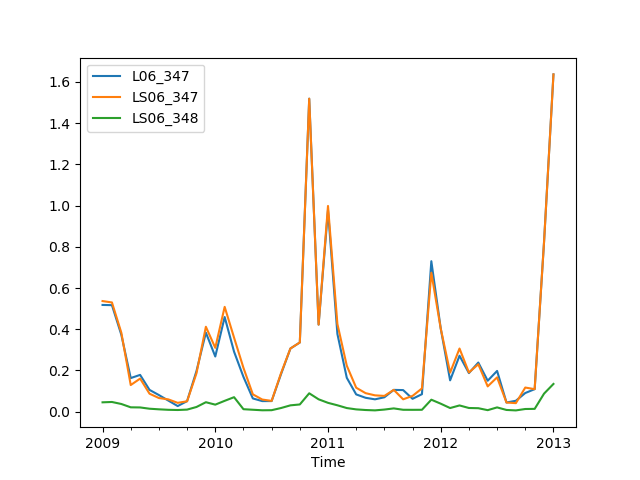

In [50]:
data.resample('M').mean().plot()